https://www.kaggle.com/c/bike-sharing-demand

In [117]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

## Load Dataset

In [118]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [119]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [121]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [122]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [123]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [124]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Explore

### NULL 인 데이터가 있는지 시각화


In [125]:
!pip install missingno

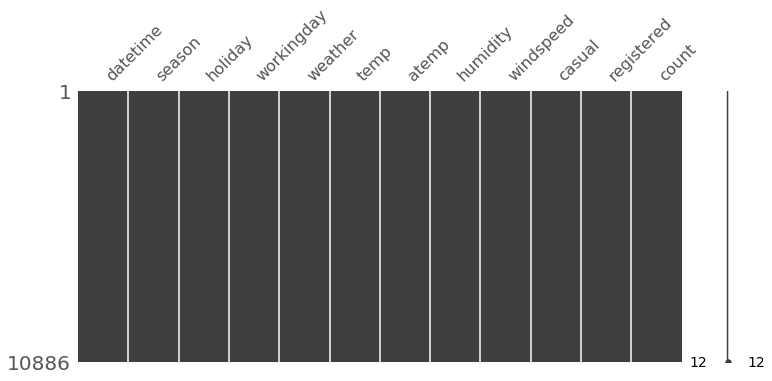

In [10]:
import missingno as msno

msno.matrix(train, figsize=(12, 5))

In [126]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


In [127]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(train.shape)
train[["datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


[Text(0.5,0,'hour'), Text(0.5,1,'시간별 대여량')]

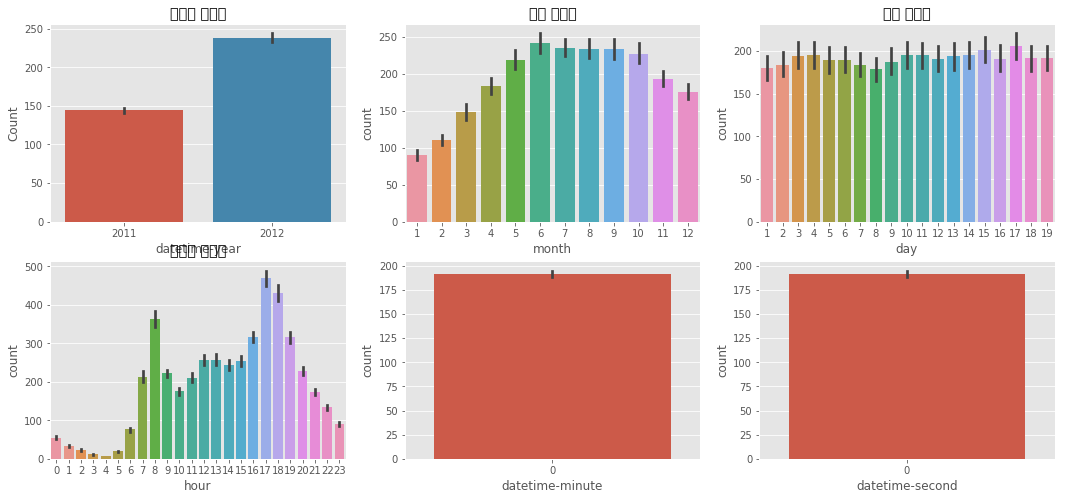

In [13]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

ax1.set(ylabel='Count', title="연도별 대여량")
ax2.set(xlabel='month', title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

### dayofweek

In [128]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


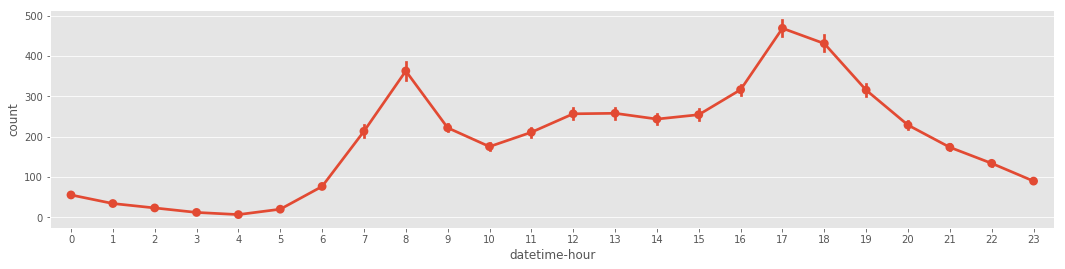

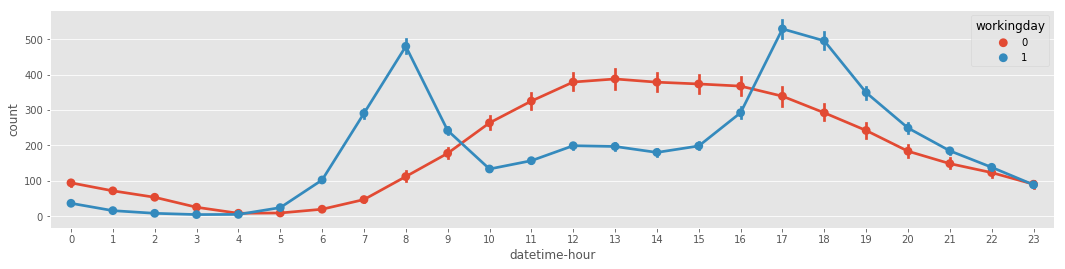

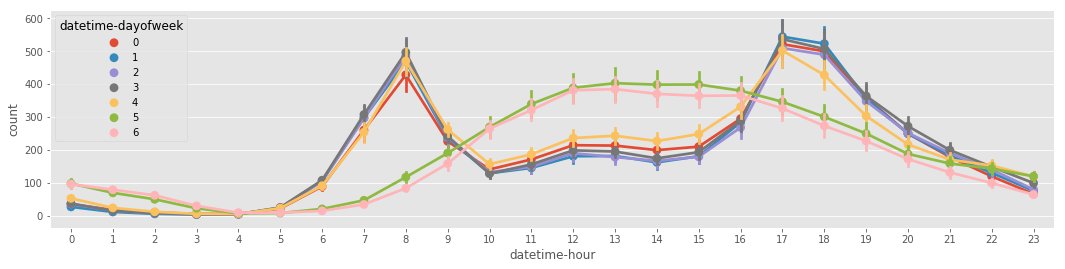

In [15]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax3)

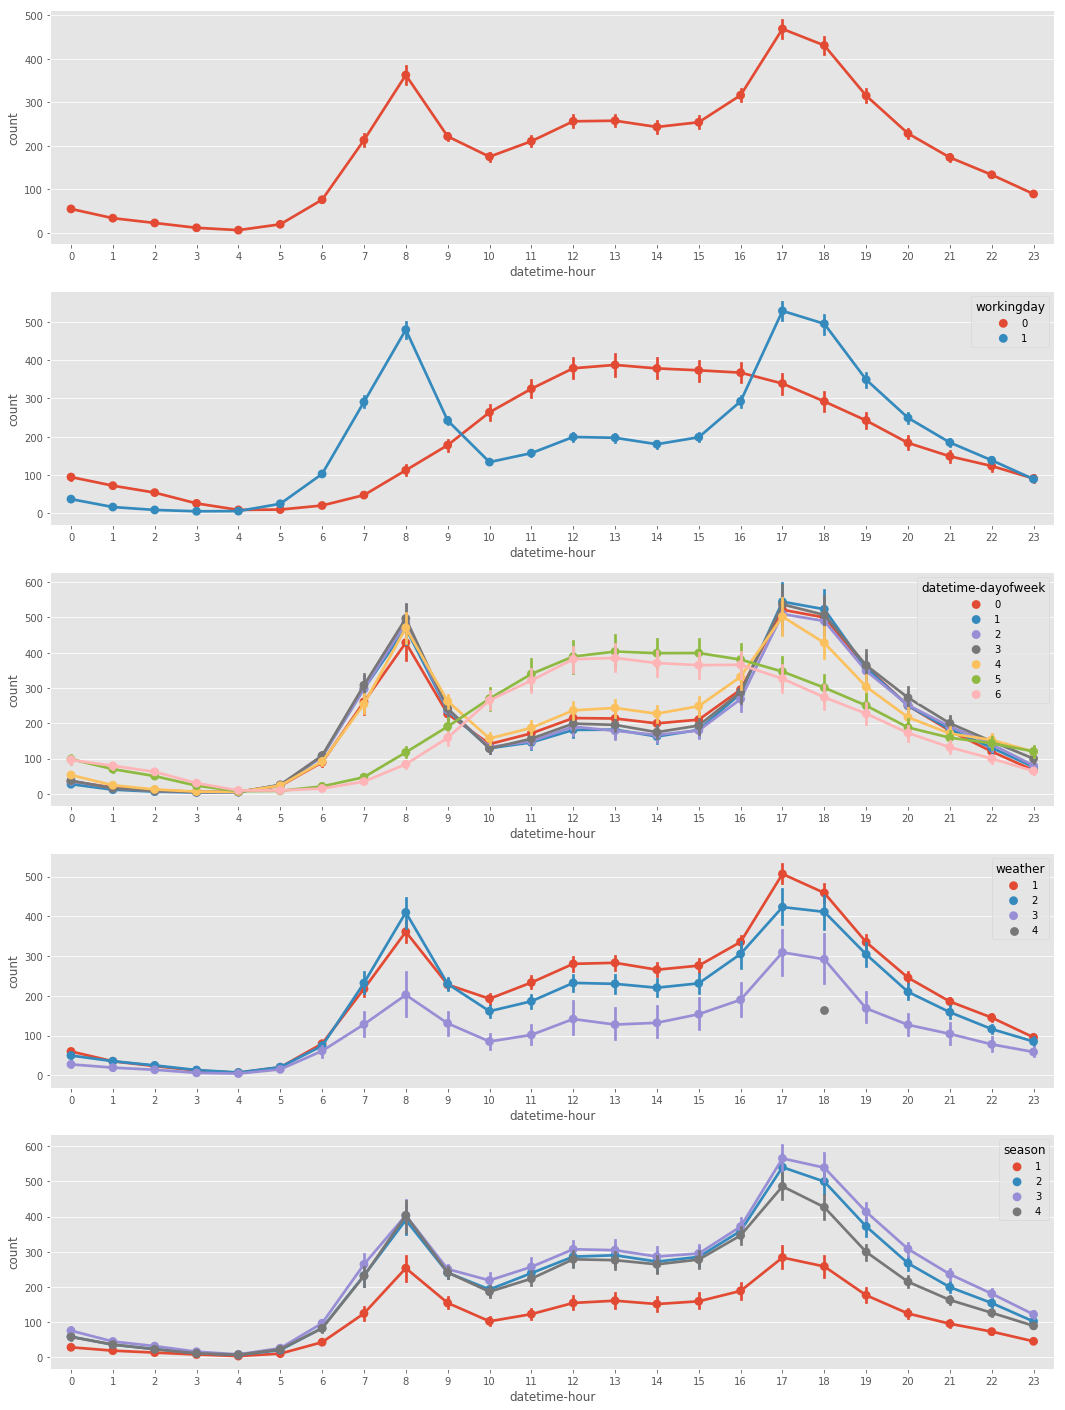

In [16]:
figure,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
figure.set_size_inches(18,25)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax3)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="season", ax=ax5)

In [17]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


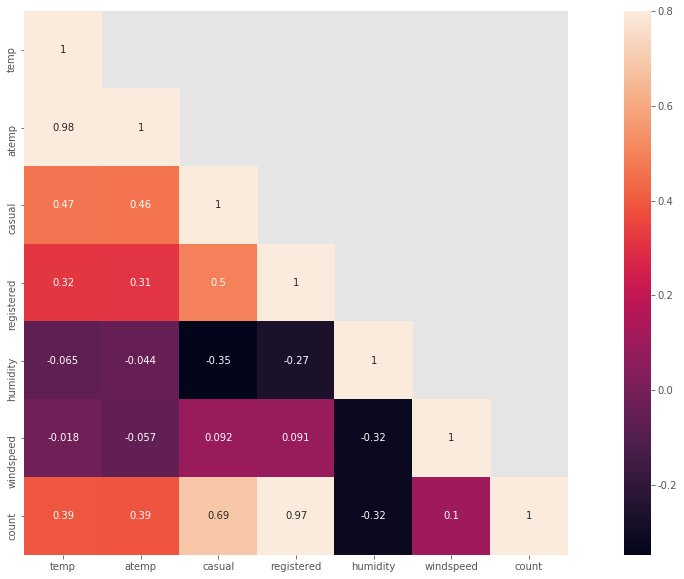

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

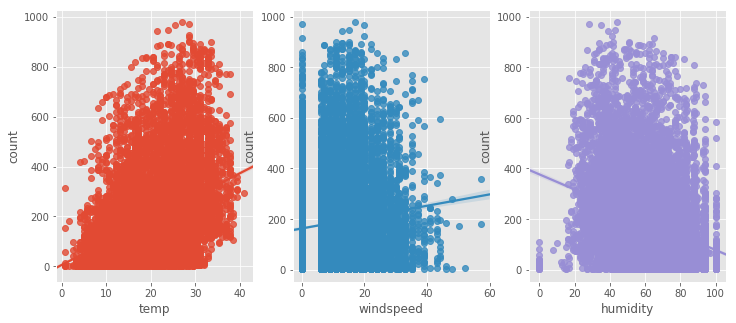

In [19]:
# 0에 몰려있는 데이터 처리 필요
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
sns.regplot(x="humidity", y="count", data=train,ax=ax3)

## Concatenate year and month

In [129]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year-month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year-month"]].head()

(10886, 20)


,datetime,datetime-year-month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


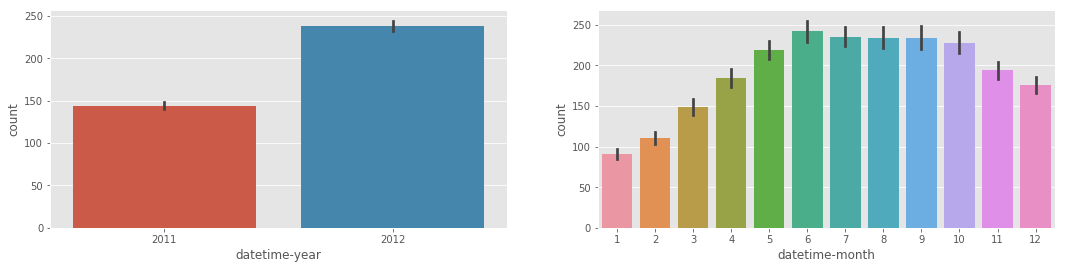

In [21]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

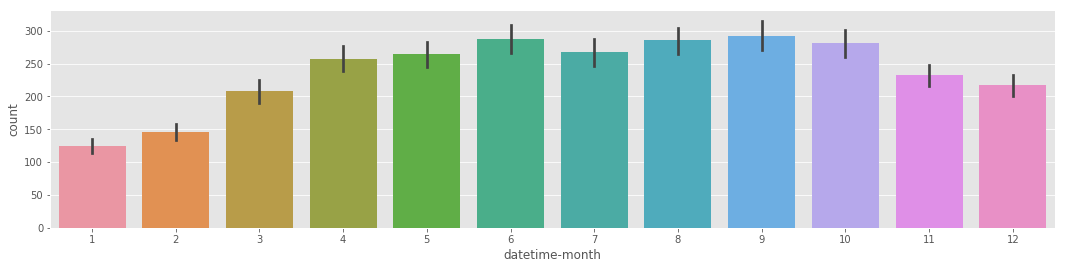

In [22]:
figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train[train["datetime-year"] == 2012], x="datetime-month", y="count", ax=ax3)

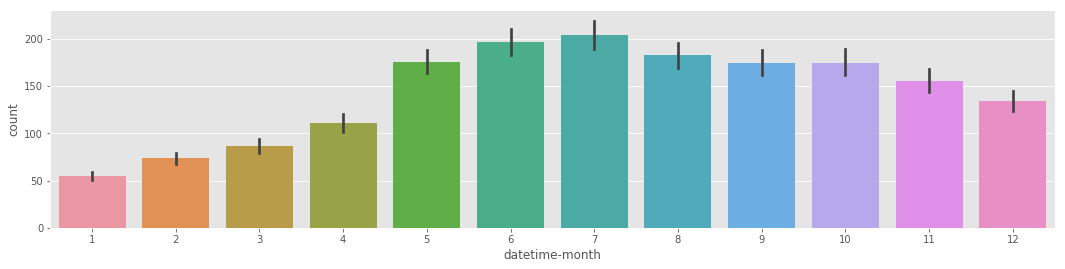

In [23]:
figure, ax4 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train[train["datetime-year"] == 2011], x="datetime-month", y="count", ax=ax4)

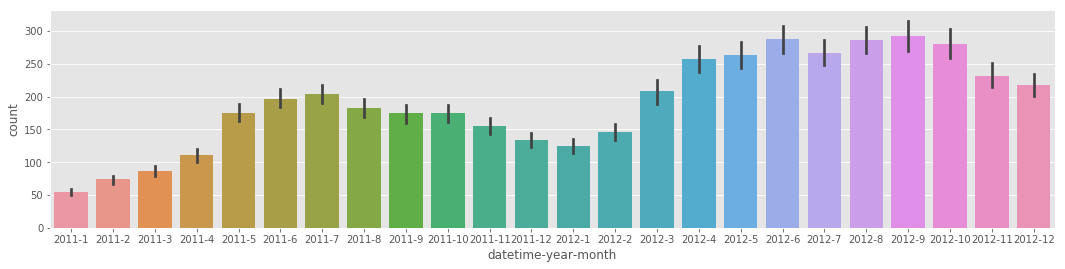

In [24]:
figure, ax5 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year-month", y="count", ax=ax5)

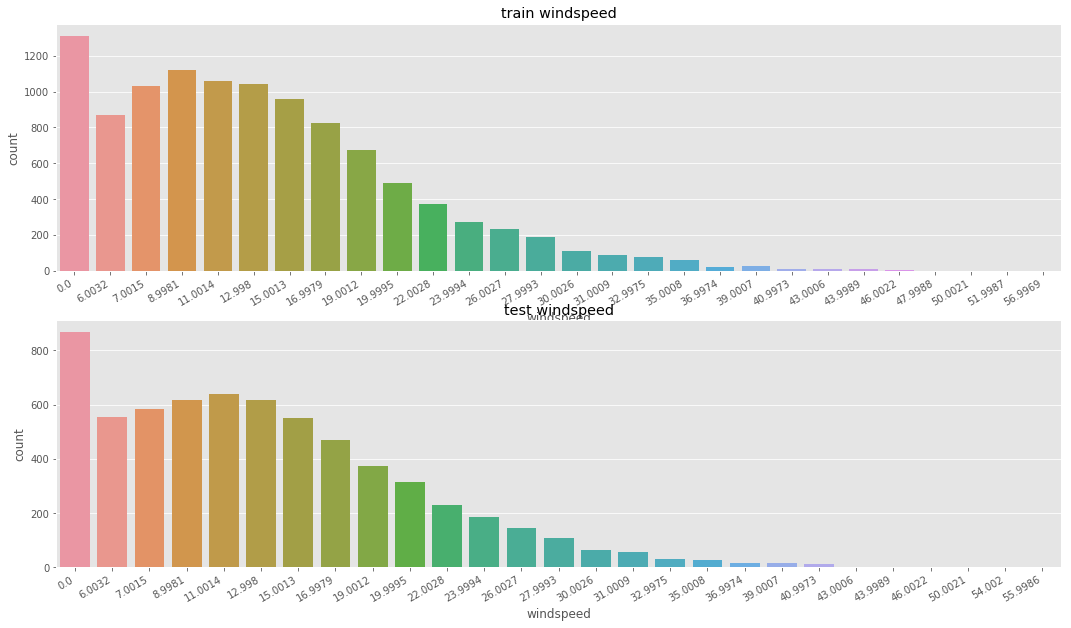

In [25]:
# widspeed 풍속에 0 값이 가장 많다. => 잘못 기록된 데이터를 고쳐 줄 필요가 있음
figure, ax = plt.subplots(nrows=2)
figure.set_size_inches(18,10)

plt.sca(ax[0])
plt.xticks(rotation=30, ha='right')
ax[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax[0])

plt.sca(ax[1])
plt.xticks(rotation=30, ha='right')
ax[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=ax[1])

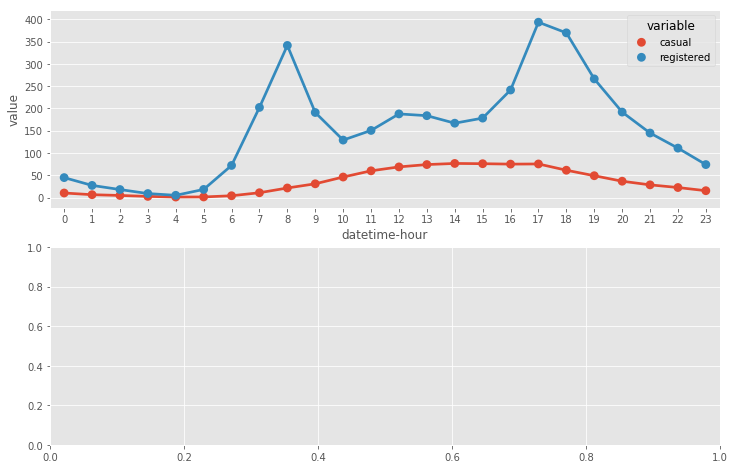

In [26]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(12,8)

hourTransformed = pd.melt(train[['datetime-hour','casual','registered']], id_vars=['datetime-hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(['datetime-hour','variable'],sort=True)['value'].mean()).reset_index()
sns.pointplot(x=hourAggregated['datetime-hour'], y=hourAggregated['value'],hue=hourAggregated['variable'],hue_order=['casual','registered'], data=hourAggregated, join=True, ax=ax1)


# hourTransformed = pd.melt(test[['datetime-hour','casual','registered']], id_vars=['datetime-hour'], value_vars=['casual', 'registered'])
# hourAggregated = pd.DataFrame(hourTransformed.groupby(['datetime-hour','variable'],sort=True)['value'].mean()).reset_index()
# sns.pointplot(x=hourAggregated['datetime-hour'], y=hourAggregated['value'],hue=hourAggregated['variable'],hue_order=['casual','registered'], data=hourAggregated, join=True, ax=ax2)

## Feature Engineering

In [130]:
# 연속형 feature와 범주형 feature
# 범주형 feature의 type을 category로 변경 해 준다.
categorical_feature_names = ["season","holiday","workingday","weather",
                             "datetime-dayofweek","datetime-month","datetime-year","datetime-hour"]

In [131]:
for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

### Windspeed

In [132]:
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 20)
(9573, 20)


In [133]:
# 그래서 머신러닝으로 예측을 해서 풍속을 넣어주도록 한다.
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택한다.
    wCol = ["season", "weather", "humidity", "datetime-month", "temp", "datetime-year", "atemp"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

/Users/leesu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/leesu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


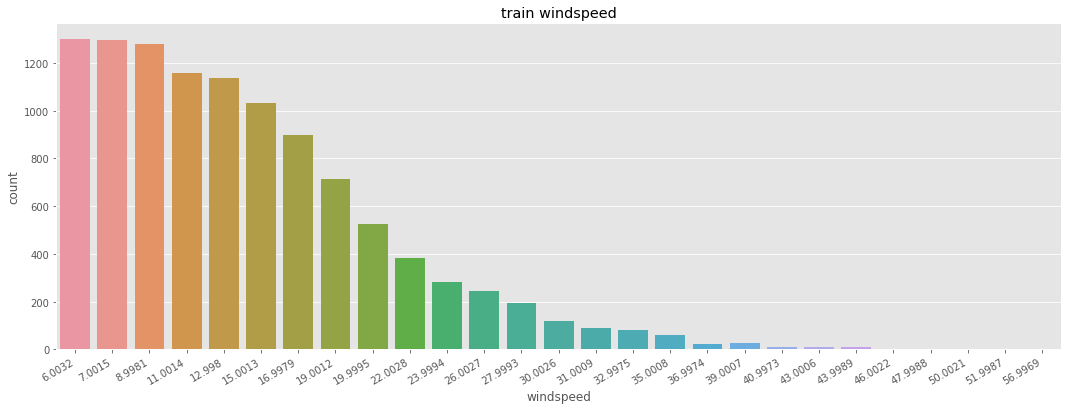

In [137]:
# 0값을 조정한다.
#train = predict_windspeed(train)
test = predict_windspeed(test)

# widspeed 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)

## Train

In [153]:
feature_names = ["season", "holiday", "workingday", "weather", "temp", "atemp",
                 "humidity", "datetime-year", "datetime-hour", "datetime-dayofweek"]

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [154]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 10)


,season,holiday,workingday,weather,temp,atemp,humidity,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,2,9.84,12.880,75,2011,5,5
1,1,0,0,1,15.58,19.695,76,2011,10,5
2,1,0,0,1,14.76,16.665,81,2011,11,5
3,1,0,0,1,17.22,21.210,77,2011,12,5
4,1,0,0,2,18.86,22.725,72,2011,13,5


In [155]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 10)


,season,holiday,workingday,weather,temp,atemp,humidity,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,2011,0,3
1,1,0,1,1,10.66,12.880,56,2011,3,3
2,1,0,1,1,10.66,12.880,56,2011,4,3
3,1,0,1,1,9.84,11.365,60,2011,5,3
4,1,0,1,1,9.02,10.605,60,2011,6,3


In [156]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [157]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

print(rmsle([1, 2, 3], [1, 2, 3]))
print(rmsle([1, 2, 3], [2, 3, 4]))
print(rmsle([1, 2, 3], [1, 4, 9]))

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

0.0
0.314619332526
0.605676350101


make_scorer(rmsle)

### Ensemble Models - Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor

seed = 21

model = RandomForestRegressor(n_estimators=100, random_state=seed)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=21, verbose=0, warm_start=False)

### Ensemble Model - Gradient Boost

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

In [159]:
y_train_log = np.log1p(y_train)

In [160]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(model, X_train, y_train_log, cv=20, scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

Score = 0.08814


In [161]:
model.fit(X_train, y_train_log)

predictions = model.predict(X_test)

print(predictions.shape)
predictions[:3]

(6493,)


array([ 2.52049438,  1.52530534,  1.32778832])

## Submit

In [162]:
submission = pd.read_csv("data/sampleSubmission.csv")

submission["count"] = np.exp(predictions) # y_train_log 를 사용했기 때문에

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.434743
1,2011-01-20 01:00:00,4.596547
2,2011-01-20 02:00:00,3.772690
3,2011-01-20 03:00:00,7.273530
4,2011-01-20 04:00:00,40.632405


In [163]:
from datetime import datetime

current_date = datetime.now()
current_date = current_date.strftime("%Y-%m-%d_%H-%M-%S")

description = "baseline-script"

filename = "{date}_{score:.5f}_{desc}.csv".format(date=current_date, score=score, desc=description)
filepath = "submissions/{filename}".format(filename=filename)

submission.to_csv(filepath, index=False)

[Text(0.5,1,'test')]

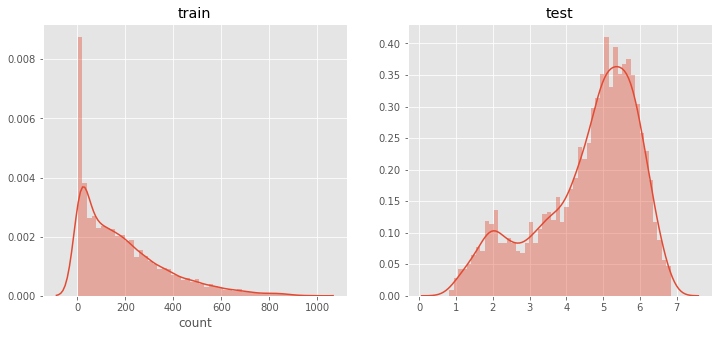

In [164]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [165]:
# 0.38659 - gradient boost
143/3251

0.04398646570286066